In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean


In [6]:
data = pd.read_csv('diabetes.csv')
x = data.drop(["Outcome"], axis=1)
y = data.Outcome
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


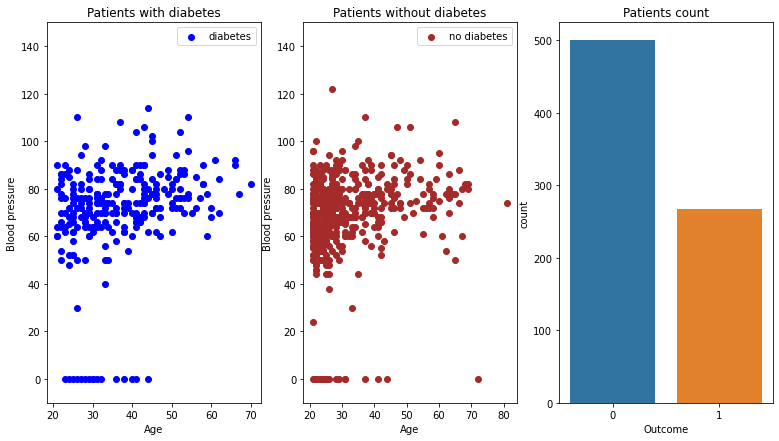

In [7]:

fig, ax = plt.subplots(1, 3, figsize=(13, 7))
ax[0].scatter(x=data[data.Outcome == 1].Age, y=data[data.Outcome == 1].BloodPressure,
              label="diabetes", c='blue')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Blood pressure")
ax[0].set_title("Patients with diabetes")
ax[0].legend()
ax[0].set_ylim([-10, 150])

ax[1].scatter(x=data[data.Outcome == 0].Age, y=data[data.Outcome == 0].BloodPressure,
              label="no diabetes", c='brown')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Blood pressure")
ax[1].set_title("Patients without diabetes")
ax[1].legend()
ax[1].set_ylim([-10, 150])

ax[2] = sns.countplot(x="Outcome", data=data)
ax[2].set_title("Patients count")
plt.show()


In [8]:
tries = 10
log_reg_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    l_reg = LogisticRegression(solver='lbfgs', max_iter=250)
    l_reg.fit(X_train, y_train)
    y_pred = l_reg.predict(X_test)  # przewidujemy na podstawie X_test
    log_reg_accuracy.append(accuracy_score(y_test, y_pred))

print("Logistic regresssion accuracies: ", log_reg_accuracy, sep=", ")
print("Mean logistic regression accuracy: ", mean(log_reg_accuracy))


Logistic regresssion accuracies: , [0.734375, 0.8125, 0.7864583333333334, 0.7864583333333334, 0.765625, 0.75, 0.7916666666666666, 0.7760416666666666, 0.7552083333333334, 0.7864583333333334]
Mean logistic regression accuracy:  0.7744791666666667


In [9]:
    # jądro svc
    svc_linear_accuracy = []
    svc = svm.SVC(kernel="linear", C=0.4)
    for i in range(tries):
        svc.fit(x, y)
        y_pred = svc.predict(x)
        svc_linear_accuracy.append(accuracy_score(y_pred, y))

    svc_rbf_accuracy = []
    svc = svm.SVC(kernel="rbf", C=0.4)
    for i in range(tries):
        svc.fit(x, y)
        y_pred = svc.predict(x)
        svc_rbf_accuracy.append(accuracy_score(y_pred, y))


In [12]:

print("RBF kernel:", svc_rbf_accuracy)
print("Linear kernel:", svc_linear_accuracy)

RBF kernel: [0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334, 0.7591145833333334]
Linear kernel: [0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375, 0.7734375]


In [13]:
# k najbliższych sąsiadów
from sklearn.neighbors import KNeighborsClassifier
knn_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=100)
    neigh.fit(X_train, y_train)
    knn_accuracy.append(neigh.score(X_test,y_test))
print("KNN:", knn_accuracy)

KNN: [0.71875, 0.6927083333333334, 0.7239583333333334, 0.7239583333333334, 0.765625, 0.65625, 0.6875, 0.734375, 0.7395833333333334, 0.6875]


Mean accuracies:
Linear kernel:  0.7734375
RBF kernel 0.7591145833333334
KNN Accuracy:  0.7130208333333333


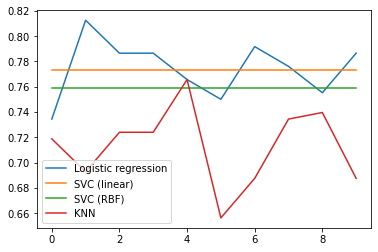

In [14]:

print("Mean accuracies:" )
print("Linear kernel: ", mean(svc_linear_accuracy))
print("RBF kernel", mean(svc_rbf_accuracy))
print("KNN Accuracy: ", mean(knn_accuracy))
ax_log_reg = plt.plot(list(range(tries)), log_reg_accuracy, label="Logistic regression")
ax_svc_linear = plt.plot(list(range(tries)), svc_linear_accuracy, label="SVC (linear)")
ax_svc_rbf = plt.plot(list(range(tries)), svc_rbf_accuracy, label="SVC (RBF)")
ax_svc_knn = plt.plot(list(range(tries)), knn_accuracy, label="KNN")

plt.legend()
plt.show()